# EDA
__import benodigde packages__

In [38]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import io

filepath_pyradiomics = "../raw_data/OPC_CT_radiomics_TCIA.xlsx"
filepath_clinical = "../raw_data/OPC_data_clinical.xlsx"

__Creëer dataframes__

In [39]:
df_CT = pd.read_excel(filepath_pyradiomics, header=1)
df_data = pd.read_excel(filepath_clinical)
#change colname
df_data.rename(columns = {'Trial PatientID':'patient'}, inplace=True)


De klinische en pyradiomics zijn niet overeenkomend in aantal patiënten. Deze moeten er eerst uitgehaalde worden.

In [40]:
#moke only a number for patient id
df_data['patient'].replace(to_replace="(OPC-)0{1,4}", value="" , regex=True, inplace=True)

patients = list(df_CT['patient'])
#remove patients in df_data that aren't there in df_CT
df_data = df_data[df_data["patient"].astype('int64').isin(patients)]

#set index
df_data.set_index("patient", inplace=True)


__Data laten zien__

__File OPC_data_clinical.xlsx__

In [44]:
df_data
#make a csv
df_data.to_csv('../dashboard/data/OPC_data_clinical.csv')


Dit is een dataset met alle klinische info van de patiënten.  
Met de volgende kollomen. Een aantal zijn voor de handliggend, deze zal ik niet uitleggen.  
Trial PatientID  
Age at diagnosis  
Sex  
ECOG Performance Status Scale, The ECOG Performance Status Scale is one such measurement. It describes a patient’s level of functioning in terms of their ability to care for themself, daily activity, and physical ability (walking, working, etc.).(https://ecog-acrin.org/resources/ecog-performance-status/)
Smoking PY, pack-year. Is het gelijk aan een pack per dag in 1 jaar.  
Smoking Hx, status van.  
Drinking hx, status van.  
Ds Site, site of tumor.  
Subsite,    
    TNM score: The TNM Classification of Malignant Tumors (TNM) is a globally recognised standard for classifying the anatomical extent of the spread of  
       
        Primary Tumor (T)  
        T0 No evidence of primary tumor   
        T1, T2, T3, T4 Increasing size and/or local extension of the primary tumor  
        TX Primary tumor cannot be assessed  

        Regional Lymph Nodes (N)  
        N0 No regional lymph node metastases  
        N1, N2, N3 Increasing number or extent of regional lymph node involvement    
        NX Regional lymph nodes cannot be assessed  

        Distant Metastasis (M)  
        M0 No distant metastases  
        M1 Distant metastases present  
        
T describes the size of the original (primary) tumor and whether it has invaded nearby tissue,  
N describes nearby (regional) lymph nodes that are involved,  
M describes distant metastasis (spread of cancer from one part of the body to another)  
Stage(AJCC 7th Edition),  
     Stage Classifi cations. Five stage classifi cations may be described for each site (Table 1.4 ):  
        Clinical stage/pretreatment stage, designated as cTNM or TNM  
        Pathologic stage, designated as pTNM  
        Post therapy or postneoadjuvant therapy stage, designated as ycTNM or ypTNM  
        Retreatment or recurrence classifi cation, designated as rTNM  
        Autopsy classifi cation, designated as aTNM   
Path  
HPV_p16 status (IHC)  
Primary Treatment  
Chemotherapy   
Time interval from the date of diagnosis to the RT start date (days)  
Time interval from the date of diagnosis to the RT end date (days)  
Dose (gy)  
Number of fractions  
RT Tech  
Time interval from the date of diagnosis to the date of last FU  (days)  
Status  
Cause of Death  
Local Failure  
Time interval from the date of diagnosis to the date of  local failure (days)  
Regional Failure  
Time interval from the date of diagnosis to the date of  regional failure (days)    
Distant Failure  
Time interval from the date of diagnosis to the date of  distant failure (days)  
Second Primary  
Time interval from the date of diagnosis to the date of 2nd cancer (days)'  


__File OPC_CT_radiomics_TCIA.xlsx__

In [45]:
df_CT
#make a csv
df_CT.to_csv('../dashboard/data/OPC_CT_radiomics_TCIA.csv')

Dit is een dataset met informatie over de gemaakte CT scans van de region of interest(ROI).
Deze zijn extract met behulp van pyradiomics.

Er zijn 130 kollomen. Die verdeelbaar zijn in 8 groepen:
basic information, 
shape features
first order features
GLCM features
GLDM features
GLRLM features
GLZSM features
NGTDM features


In [7]:
basic_information = 0 
shape_features = 23
first_order_features = 38
GLCM_features = 55 
GLDM_features = 79
GLRLM_features = 93 
GLZSM_features = 109 
NGTDM_features = 125


allemaal algemene info van de kollommen


In [8]:
#get info of dataframe
buffer = io.StringIO()
df_CT.info(buf=buffer, verbose=True)
s = buffer.getvalue()
with open("df_CT_info.txt", "w",
          encoding="utf-8") as f:  
    f.write(s)

eh niet echt iets zichtbaar in die info want te veel kollommen 
Dus eerst focussen op de eerste feature, de shape features.

In [9]:
#get shapefeature
df_shape = df_CT.iloc[:, shape_features: first_order_features-1]


#make dataframe with a bool if correlation above 95%
shapcorr = df_shape.corr()
shap = shapcorr.ge(0.95)

names = {}
#get rownames
for col_name in shap:
    row = list(shap[shap.loc[col_name] == True].index) 
    #remove the crossing
    row.remove(col_name)
    if row:
        names[col_name] = row
#print the ones with high correlation
for name,others in names.items():
    print(name)
    print(others)

original_shape_MajorAxisLength
['original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum3DDiameter']
original_shape_Maximum2DDiameterColumn
['original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum3DDiameter']
original_shape_Maximum2DDiameterRow
['original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum3DDiameter']
original_shape_Maximum3DDiameter
['original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow']
original_shape_MeshVolume
['original_shape_SurfaceArea', 'original_shape_VoxelVolume']
original_shape_SurfaceArea
['original_shape_MeshVolume', 'original_shape_VoxelVolume']
original_shape_VoxelVolume
['original_shape_MeshVolume', 'original_shape_SurfaceArea']


Van de bovenstaande is het lastig om te bepalen welke weg te halen doordat ze allemaal iets over de diameter zeggen. Maar dit allemaal bij verschillende onderwerpen wordt gebruikt, zie onderstaande kolommen.

In [10]:
print(df_shape.columns)

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_shape_VoxelVolume'],
      dtype='object')


Als je van alle bovenstaande een histogram zou maken om te kijken naar de spreiding en hoeverre de kolommen met een hoge correlatie op elkaar lijken.

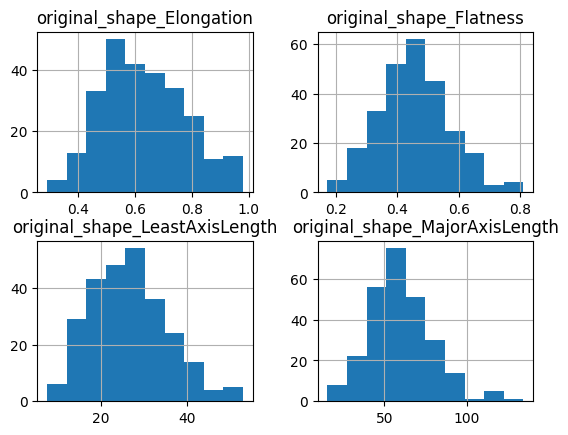

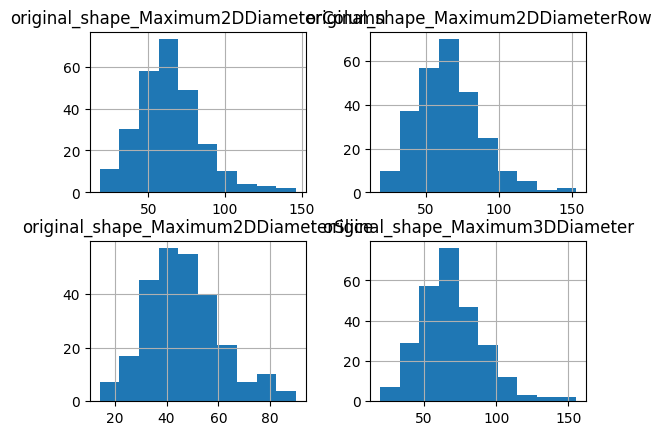

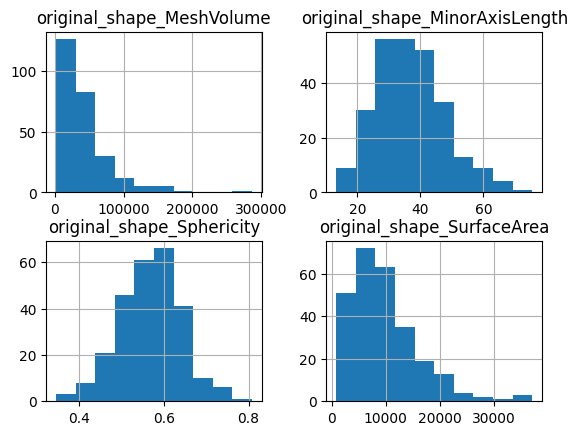

In [11]:
old_times = 0
for times in range(0, len(df_shape.columns), 4): 
    if int(times) != 0:  
        histogsham = df_shape.iloc[:, old_times:times].hist()
        old_times=times

Als je de histogrammen van de correlerende kollomen met elkaar vergelijkt. Doormiddel van het blootte oog zie je dat voornamelijke majoraxislength, maximum2ddiameterrow maximum3ddiameter op elkaar lijken. Hierdoor kies ik ervoor om toch deze correlerende er uit te filteren. Om vervolgens een aantal grafieken met elkaar te maken.

In [37]:
cor_df_shape = df_shape.loc[:, ['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio']]
merge_corr_df_shape = pd.concat([cor_df_shape,df_data], axis=1)

merge_corr_df_shape

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,Age at diagnosis,...,Status,Cause of Death,Local Failure,Time interval from the date of diagnosis to the date of local failure (days),Regional Failure,Time interval from the date of diagnosis to the date of regional failure (days),Distant Failure,Time interval from the date of diagnosis to the date of distant failure (days),Second Primary,Time interval from the date of diagnosis to the date of 2nd cancer (days)
0,0.688608,0.540468,29.382158,46.173586,64.876806,37.435671,0.604673,8727.224465,0.242107,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.675565,0.536580,20.921578,33.120990,46.065171,26.340705,0.687436,4149.716086,0.289646,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.634223,0.479827,28.477824,49.396356,68.161573,37.641266,0.608044,9271.372824,0.232944,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.659904,0.481861,22.561287,45.221676,52.896125,30.897470,0.605112,5502.302457,0.304579,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.903713,0.336308,7.300546,27.018512,27.018512,19.617722,0.644759,1203.352906,0.592153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.091667,...,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.280556,...,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0.0
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.288889,...,Dead,Other Cancer,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2758.0
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.947222,...,Dead,Other Cause,Yes,269.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
stop = False
columns= []

for column in merge_corr_df_shape:
    if column == "Age at diagnosis":
        stop = True
    if stop == False:
        columns.append(column)
        for column2 in columns:
            merge_corr_df_shape.plot.scatter(column, column2, color="Status")
    
        


    


NameError: name 'merge_corr_df_shape' is not defined

In [ ]:
w_23 = df_CT.iloc[:,23:]

#correlatie?
corr = w_23.corr()

#corr higher than 0.8
corr_80 = corr.ge(0.8)


names = {}
#get rownames
for col_name in corr_80:
    row = list(corr_80[corr_80.loc[col_name] == True].index) 
    #remove the crossing
    row.remove(col_name)
    if row:
        names[col_name] = row

#dataframe
print(len(set(names)))


87
